## SCRAPING SITO DEL CENTRO RICERCA IN DATA SCIENCE KDD

* **DALLA HOME CERCO LA LISTA DI PAGINE DEL SITO COLLEGATE**
* **SCARICO IL CONTENUTO ULITE; CIOè SOLO IL TESTO DI TUTTE LE PAGINE**
* **PULIZIA DEI TESTI + PAROLE FREQ**

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import urllib.request
import validators
from tqdm import tqdm

In [2]:
url = "https://kdd.isti.cnr.it/"
response=requests.get(url)
print(response)
soup = BeautifulSoup(response.text, "html.parser")

print(soup.title.string)

<Response [200]>
Knowledge Discovery and Data Mining Laboratory | Istituto di Scienza e Tecnologie dell'Informazione, CNR Dipartimento di Informatica, Università di Pisa


In [3]:
lista_url=[]
for link in soup.findAll("a"):
    lista_url.append(link.get("href"))
    
lista_url=list(set(lista_url))
res = [] 
for val in lista_url: 
    if val != None : 
        res.append(val)
res

['/biblio/year',
 '/highlights/phd-data-science-20172018-call-applications',
 '/blog',
 'http://www.cnr.it',
 'mailto:daniele.fadda@isti.cnr.it',
 'https://kdd.isti.cnr.it/home #lightbox-popup-6',
 '/research/analytical-platforms-and-infrastructures-social-mining',
 '/people/guidotti-riccardo',
 '/highlights/university-pisa-phd-20172018-call-applications',
 '/file/machine-learning-tools-and-how-they-can-contribute-risk-assessment-sport',
 '/highlights/master-big-data-analytics-and-social-mining-20172018-call-applications',
 '/publications/human-migration-big-data-perspective',
 '/',
 '/people/pedreschi-dino',
 'https://kdd.isti.cnr.it/home #lightbox-popup-4',
 '/file/exploring-football-match-events-python',
 '/privacy',
 'https://kdd.isti.cnr.it/sites/kdd.isti.cnr.it/files/Img-BDEED.JPG',
 '/resources/dataset',
 '/people/giannotti-fosca',
 'https://t.me/KDDLab',
 'http://www.twitter.com/kdd_lab',
 '/project/datasim',
 '#',
 'https://www.linkedin.com/company/kdd-lab/',
 'https://kdd.ist

In [4]:
matchers = ['/publications','project','/research']
lista_url2 = [s for s in res if any(xs in s for xs in matchers)]
lista_url2=list(set(lista_url2))
lista_url2

['/project/data-science-phd',
 '/publications/relationship-between-human-mobility-and-viral-transmissibility-during-covid-19',
 '/project/bringing-citizens-models-and-data-together-participatory-interactive-social-exploratories',
 '/project/science-and-technology-explanation-ai-decision-making',
 '/project/european-ai-demand-platform-and-ecosystem',
 '/research/applied-data-science-and-visual-analytics',
 '/research/mobility-data-mining-science-cities',
 '/projects',
 '/project/big-data-estimating-socio-economic-development',
 '/research/ethical-trustworthy-interactive-ai',
 '/project/adaptive-highly-scalable-analytics-platform',
 '/research/analytical-platforms-and-infrastructures-social-mining',
 '/project/big-data-smart-energy',
 '/publications/human-migration-big-data-perspective',
 '/project/understanding-human-migration-flows',
 '/publications/authenticated-outlier-mining-outsourced-databases-0',
 '/publications/digital-footprints-international-migration-twitter',
 '/project/prom

In [5]:
string = 'https://kdd.isti.cnr.it' 
lista_url2 = [string+x for x in lista_url2]
lista_url2

['https://kdd.isti.cnr.it/project/data-science-phd',
 'https://kdd.isti.cnr.it/publications/relationship-between-human-mobility-and-viral-transmissibility-during-covid-19',
 'https://kdd.isti.cnr.it/project/bringing-citizens-models-and-data-together-participatory-interactive-social-exploratories',
 'https://kdd.isti.cnr.it/project/science-and-technology-explanation-ai-decision-making',
 'https://kdd.isti.cnr.it/project/european-ai-demand-platform-and-ecosystem',
 'https://kdd.isti.cnr.it/research/applied-data-science-and-visual-analytics',
 'https://kdd.isti.cnr.it/research/mobility-data-mining-science-cities',
 'https://kdd.isti.cnr.it/projects',
 'https://kdd.isti.cnr.it/project/big-data-estimating-socio-economic-development',
 'https://kdd.isti.cnr.it/research/ethical-trustworthy-interactive-ai',
 'https://kdd.isti.cnr.it/project/adaptive-highly-scalable-analytics-platform',
 'https://kdd.isti.cnr.it/research/analytical-platforms-and-infrastructures-social-mining',
 'https://kdd.ist

In [6]:
texts = []
title= []
for url in lista_url2[:]:
    res = requests.get(url)
    soup_l = BeautifulSoup(res.text, "html.parser")
    title.append(soup_l.title.string)
    content_l=soup_l.find('section',{"id":"section-main-content"})
    content_l=content_l.get_text()
    texts.append(content_l)
    
title

['Data Science Ph.D. | Knowledge Discovery and Data Mining Laboratory',
 'The relationship between human mobility and viral transmissibility during the COVID-19 epidemics in Italy | Knowledge Discovery and Data Mining Laboratory',
 'Bringing Citizens, Models and Data together in Participatory, Interactive SociaL Exploratories | Knowledge Discovery and Data Mining Laboratory',
 'Science and technology for the eXplanation of AI decision making | Knowledge Discovery and Data Mining Laboratory',
 'A European AI On Demand Platform and Ecosystem | Knowledge Discovery and Data Mining Laboratory',
 'Applied Data Science and Visual Analytics | Knowledge Discovery and Data Mining Laboratory',
 'Mobility Data Mining for Science of Cities | Knowledge Discovery and Data Mining Laboratory',
 'Projects | Knowledge Discovery and Data Mining Laboratory',
 'Big Data for Estimating Socio-Economic Development | Knowledge Discovery and Data Mining Laboratory',
 'Ethical, Trustworthy, Interactive AI | Knowl

In [7]:
texts[0]

'\n\n\n\n\n\n\n\n\n\n\n\n\n\nData Science is emerging as a disruptive consequence of the digital revolution. Based on the combination of big data availability, sophisticated data analysis techniques, and scalable computing infrastructures, Data Science is rapidly changing the way we do business, socialize, conduct research, and govern society. It is also changing the way scientific research is performed. Model-driven approaches are supplemented with data-driven approaches. A new paradigm emerged, where theories and models and the bottom up discovery of knowledge from data mutually support each other. Experiments and analyses over massive datasets are functional not only to the validation of existing theories and models, but also to the data-driven discovery of patterns emerging from data, which can help scientists design better theories and models, yielding deeper understanding of the complexity of social, economic, biological, technological, cultural and natural phenomena.\nData scien

In [8]:
texts2 = []    
for element in texts:
    texts2.append(element.replace('\n',' ').replace('\xa0', ' '))

#print(texts2)

In [9]:
texts2[1]

'              TitleThe relationship between human mobility and viral transmissibility during the COVID-19 epidemics in Italy  Publication TypeJournal Article  Year of Publication2020  AuthorsCintia, P, Fadda, D, Giannotti, F, Pappalardo, L, Rossetti, G, Pedreschi, D, Rinzivillo, S, Bonato, P, Fabbri, F, Penone, F, Savarese, M, Checchi, D, Chiaromonte, F, Vineis, P, Guzzetta, G, Riccardo, F, Marziano, V, Poletti, P, Trentini, F, Bella, A, Andrianou, X, Del Manso, M, Fabiani, M, Bellino, S, Boros, S, Urdiales, AMateo, Vescio, MFenicia, Brusaferro, S, Rezza, G, Pezzotti, P, Ajelli, M, Merler, S  JournalarXiv preprint arXiv:2006.03141  AbstractWe describe in this report our studies to understand the relationship between human mobility and the spreading of COVID-19, as an aid to manage the restart of the social and economic activities after the lockdown and monitor the epidemics in the coming weeks and months. We compare the evolution (from January to May 2020) of the daily mobility flows 

In [10]:
import nltk
words = set(nltk.corpus.words.words())

texts3 = []    
for element in texts2:
    element= " ".join(w for w in nltk.wordpunct_tokenize(element) if w.lower() in words or not w.isalpha())
    element = ''.join(i for i in element if not i.isdigit())
    texts3.append(element)

In [12]:
texts3[1]

'relationship between human mobility and viral transmissibility during the COVID -  in Publication Article Year of Publication , P , , D , , F , , L , , G , , D , , S , , P , , F , , F , , M , , D , , F , , P , , G , , F , , V , , P , , F , , A , , X , Manso , M , , M , , S , , S , , , , , , S , , G , , P , , M , , S preprint :  .  describe in this report our to understand the relationship between human mobility and the spreading of COVID -  , as an aid to manage the restart of the social and economic after the and monitor the in the coming and . We compare the evolution ( from to May  ) of the daily mobility in , measured by of nation - wide mobile phone data , and the evolution of transmissibility , measured by the net reproduction number , i . e ., the mean number of secondary by one primary infector in the presence of control and human . We find a striking relationship between the negative variation of mobility and the net reproduction number , in all , between March th and March t

### TEXT CLEANING

In [13]:
import pandas as pd 
import matplotlib.pyplot as plt
import string 
import re 
import nltk
import numpy as np 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

def text_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def tokenize(text):
    text = word_tokenize(text)
    return text

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

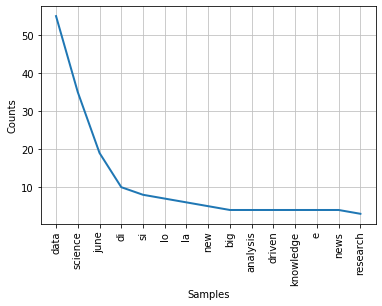

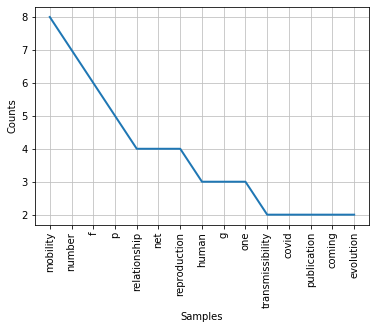

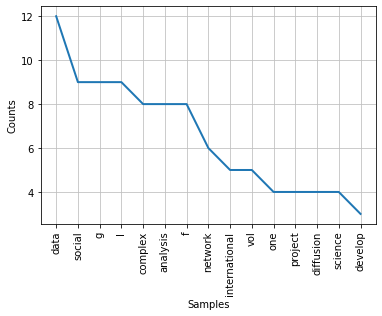

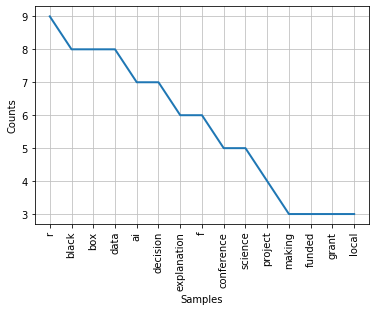

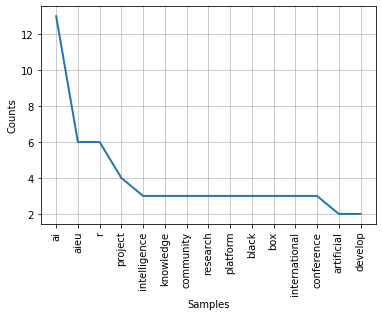

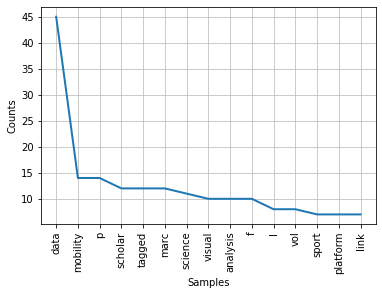

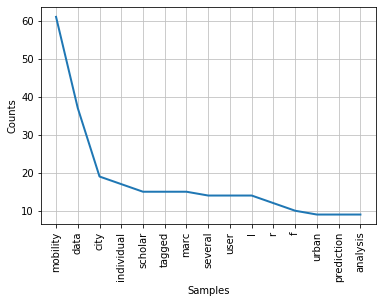

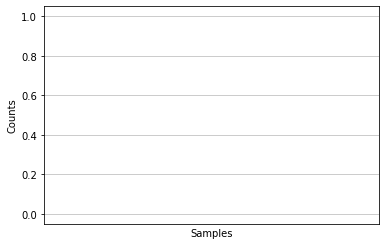

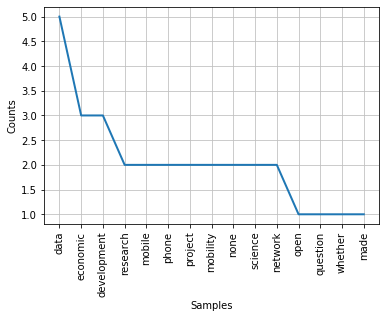

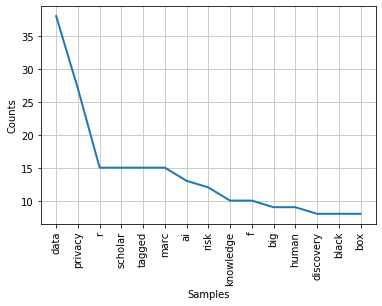

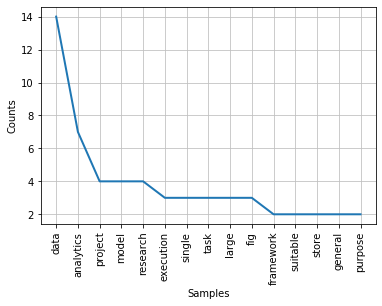

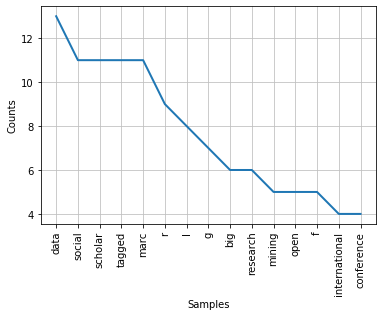

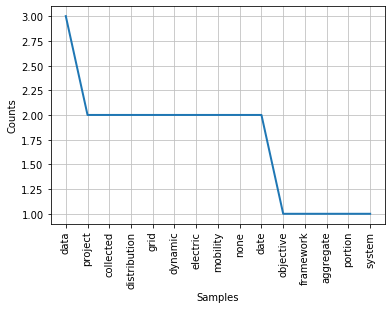

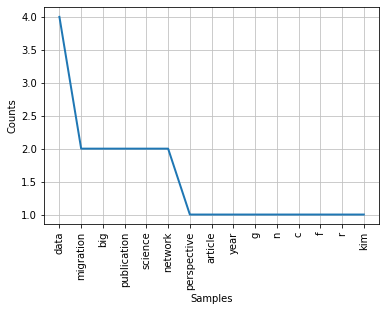

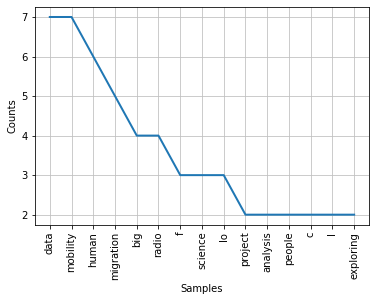

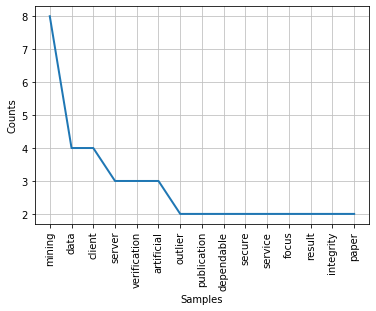

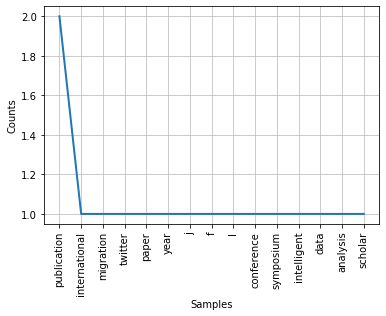

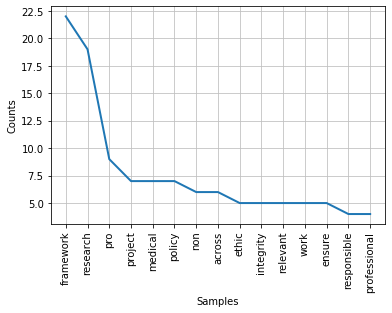

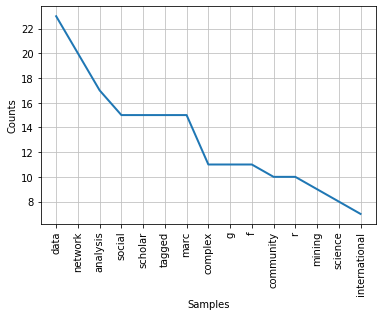

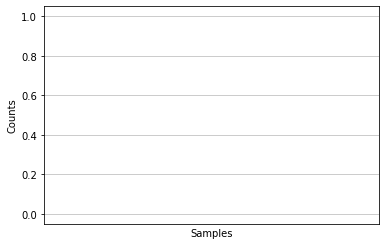

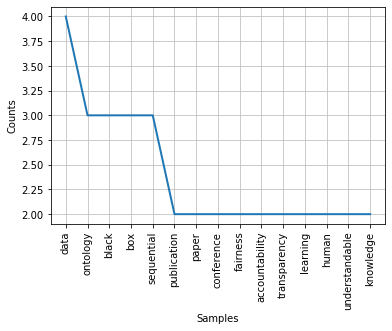

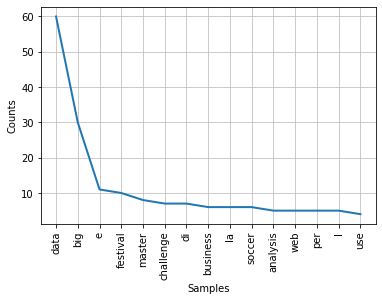

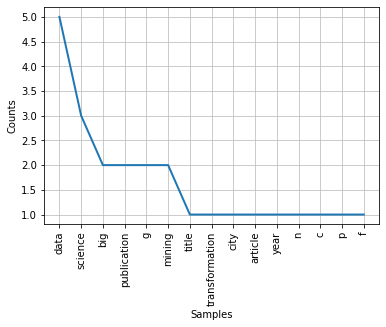

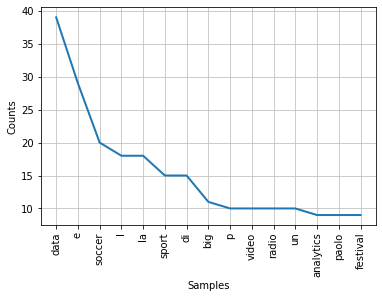

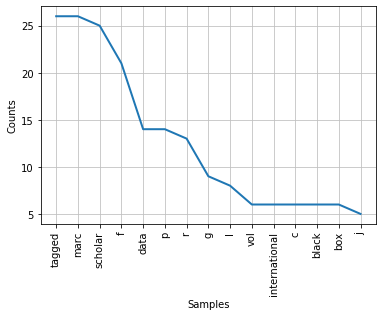

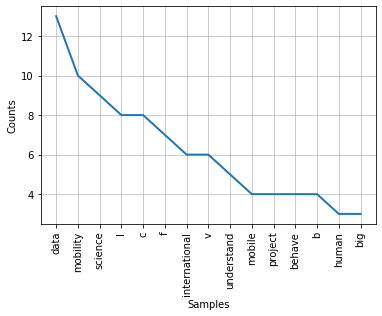

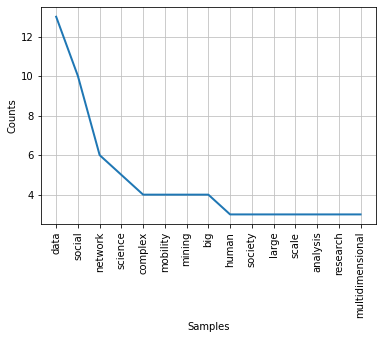

In [15]:
from nltk.probability import FreqDist

clean_texts=[]
for url in texts3[:]:
    clean = preprocessing(url)
    clean_texts.append(clean)
    
freq_word=[]
for url in clean_texts[:]:
    tokens=word_tokenize(url)
    fdist = FreqDist(tokens)
    #print(fdist.most_common(10))
    freq_word.append(fdist)
    
for url in freq_word[:]:
    url.plot(15,cumulative=False)
    plt.show()

In [16]:
#results = pd.DataFrame({'Title' : title, 'Freq_word' : freq_word}) 
#results

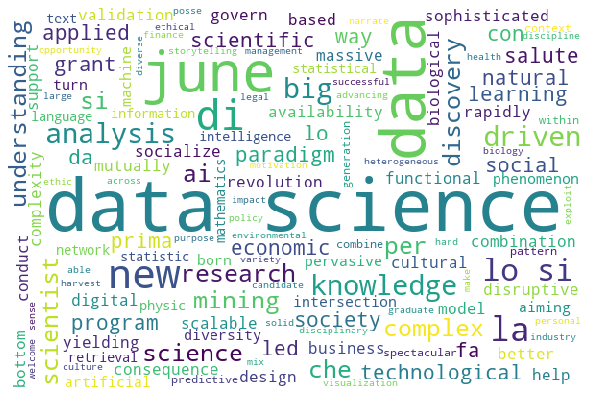

In [17]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(clean_texts[0]) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Parole frequenti sul totale

In [18]:
tot_text = ''.join(map(str, clean_texts))
type(tot_text)

str

In [19]:
tot_text=' '.join( [w for w in tot_text.split() if len(w)>1] )
tot_text = ''.join(i for i in tot_text if not i.isdigit())

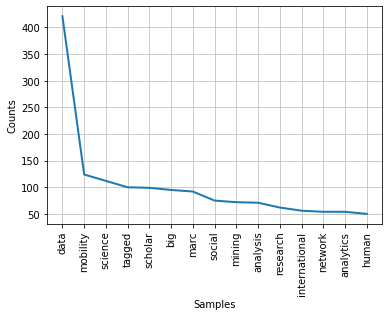

In [20]:
tokens=word_tokenize(tot_text)
fdist = FreqDist(tokens)

fdist.plot(15,cumulative=False)
plt.show()

**salvo la stringa contenente il contenuto di tutte le pagine del sito in un file a parte**

In [21]:
textfile = open('KDD.txt', 'w')
textfile.write(tot_text)
textfile.close()

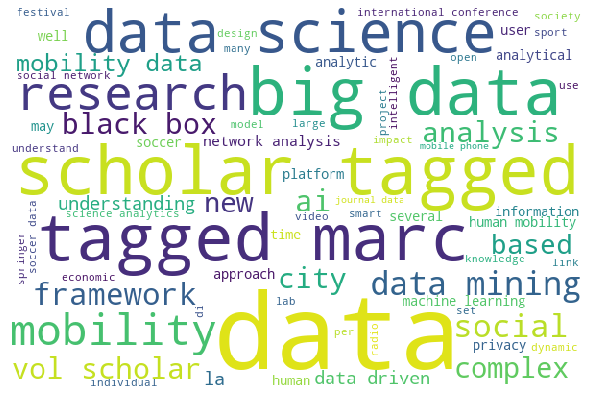

In [22]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(tot_text) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()